✅ Dataset loaded successfully: ../data/sierraleone_clean.csv
Shape: (525600, 20)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,GHI_z
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,-0.678931
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,-0.678931
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,-0.678931
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN,-0.678931
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN,-0.678931



--- Summary Statistics ---


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,GHI_z
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0,5.256000e+05
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN,4.152944e-17
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN,1.000001e+00
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN,-7.419140e-01
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN,-6.859666e-01
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN,-6.755812e-01
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN,5.375050e-01
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN,4.345276e+00



--- Missing Values per Column ---


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
GHI_z                 0
dtype: int64


Outlier count (|Z|>3): 2477


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,GHI_z
663,2021-10-30 11:04:00,1119.0,673.5,538.4,1193.0,1167.0,26.3,83.1,0.1,1.1,0.3,100.5,6.9,1002,0,0.0,60.5,53.2,NaN,3.072222
671,2021-10-30 11:12:00,1154.0,755.7,491.3,1237.0,1208.0,27.0,82.4,1.2,1.9,0.6,69.5,12.6,1002,0,0.0,66.1,59.2,NaN,3.189477
780,2021-10-30 13:01:00,1111.0,812.0,361.4,1189.0,1162.0,29.5,73.0,0.7,1.4,0.6,164.7,7.7,1000,0,0.0,66.4,63.5,NaN,3.045421
781,2021-10-30 13:02:00,1126.0,815.0,373.3,1202.0,1175.0,29.7,72.4,0.6,1.6,0.6,183.8,11.7,1000,0,0.0,68.1,64.9,NaN,3.095673
782,2021-10-30 13:03:00,1151.0,813.0,400.1,1226.0,1198.0,30.0,72.2,2.1,2.6,0.5,205.7,11.9,1000,0,0.0,69.5,66.0,NaN,3.179426


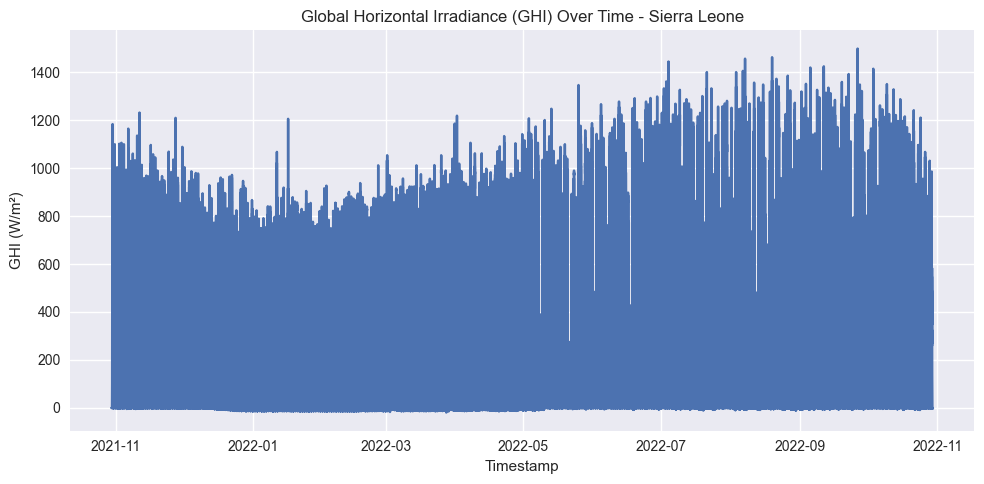

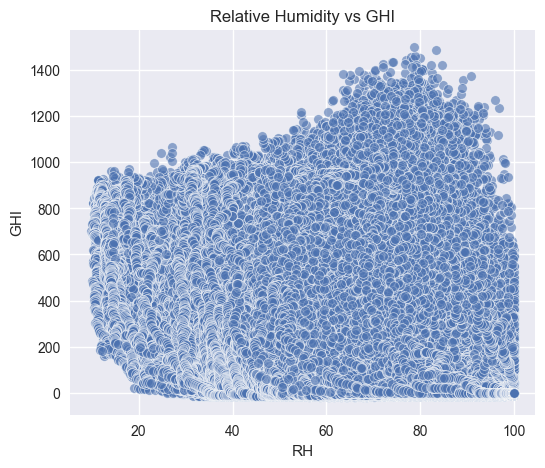

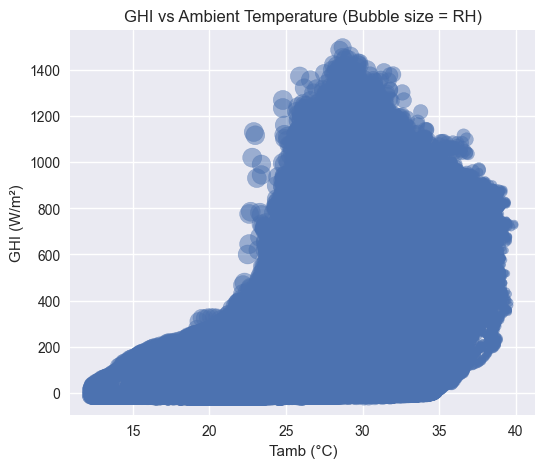

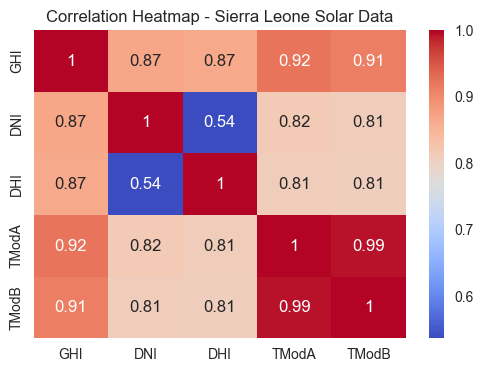


✅ EDA completed using the cleaned dataset.


In [5]:
# Sierra Leone Solar Data - EDA (Professional Version)

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

# --- 1. Load Cleaned Dataset ---
file_path = '../data/sierraleone_clean.csv'

# Check if file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(
        f"❌ Dataset not found at {file_path}. "
        "Please make sure the file is in the data folder."
    )

# Load dataset
df = pd.read_csv(file_path)
print(f"✅ Dataset loaded successfully: {file_path}")
print("Shape:", df.shape)
display(df.head())

# --- 2. Summary Statistics & Missing Values ---
print("\n--- Summary Statistics ---")
display(df.describe())

print("\n--- Missing Values per Column ---")
display(df.isna().sum())

# --- 3. Outliers Detection (Z-score) ---
# Detect outliers in GHI
df['GHI_z'] = zscore(df['GHI'])
outliers = df[df['GHI_z'].abs() > 3]
print(f"\nOutlier count (|Z|>3): {len(outliers)}")
display(outliers.head())

# --- 4. Planned Visualizations ---

# Line Plot: GHI over time
plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['Timestamp']), df['GHI'])
plt.title('Global Horizontal Irradiance (GHI) Over Time - Sierra Leone')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

# Scatter Plot: RH vs GHI
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.6)
plt.title('Relative Humidity vs GHI')
plt.show()

# Bubble Chart: GHI vs Tamb (size = RH)
plt.figure(figsize=(6,5))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*2, alpha=0.5)
plt.title('GHI vs Ambient Temperature (Bubble size = RH)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()

# Heatmap: Correlation between key metrics
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(6,4))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Sierra Leone Solar Data')
plt.show()

# --- 5. Save (Optional, already cleaned) ---
# df.to_csv('../data/sierraleone_clean.csv', index=False)
print("\n✅ EDA completed using the cleaned dataset.")
